In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data loading

In [2]:
data_customers = pd.read_csv('olist_customers_dataset.csv')
data_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
data_order_items = pd.read_csv('olist_order_items_dataset.csv')
data_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
data_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
data_orders_dataset = pd.read_csv('olist_orders_dataset.csv')
data_products_dataset = pd.read_csv('olist_products_dataset.csv')
data_sellers_dataset = pd.read_csv('olist_sellers_dataset.csv')
data_category_name_translation = pd.read_csv('product_category_name_translation.csv')
parse_dates=True

# Data analysis

In [242]:
data_customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [243]:
data_customers.name = 'customers'

In [244]:
data_geolocation.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [245]:
data_geolocation.name = 'geolocation'

In [246]:
data_order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [247]:
data_order_items.name = 'order_items'

In [248]:
data_order_payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [249]:
data_order_payments.name = 'order_payments'

In [250]:
data_order_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [251]:
data_order_reviews.name = 'order_reviews'

In [252]:
data_orders_dataset.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [253]:
data_orders_dataset.name = 'orders_dataset'

In [254]:
data_products_dataset.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [255]:
data_products_dataset.name = 'products_dataset'

In [256]:
data_sellers_dataset.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [257]:
data_sellers_dataset.name = 'sellers_dataset'

In [258]:
data_category_name_translation.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [259]:
data_category_name_translation.name = 'category_name_translation'

### Shape

In [260]:
list_data = [data_customers,data_geolocation,data_order_items,data_order_payments,data_order_reviews,data_orders_dataset,data_products_dataset,data_sellers_dataset,data_category_name_translation]

In [261]:
for i in list_data:
    print(i.name+" : "+str(i.shape))

customers : (99441, 5)
geolocation : (1000163, 5)
order_items : (112650, 7)
order_payments : (103886, 5)
order_reviews : (99224, 7)
orders_dataset : (99441, 8)
products_dataset : (32951, 9)
sellers_dataset : (3095, 4)
category_name_translation : (71, 2)


### Type of features

In [262]:
for i in list_data:
    print(i.dtypes)

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       

### NAN Analysis

In [263]:
for i in list_data:
    print(i.isna().mean())

customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64
geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64
order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64
review_id                  0.000000
order_id                   0.000000
review_score               0.000000
review_comment_title       0.883415
review_comment_message     0.587025
review_creation_date       0.000000
review_answer_timestamp    0.000000
dtype: float64
order_id 

# Cleaning

# Pousser l'analyse sur les commentaire

In [264]:
#Verification moyenne NAN
data_order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Replace NAN value by "No comment" in data_order_reviews dataframe

In [265]:
data_order_reviews['review_comment_message'] = data_order_reviews['review_comment_message'].fillna("No comment")

In [266]:
data_order_reviews['review_comment_title'] = data_order_reviews['review_comment_title'].fillna("No comment")

In [267]:
#Verification moyenne NAN
data_order_reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [268]:
#Verification moyenne NAN
data_orders_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [269]:
#Verification moyenne NAN
data_products_dataset.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

### Duplicates

Print of the duplicates of all Dataframes, we see that data_geolocation has duplicates

In [270]:
# Afficher nom colonne 
for i in list_data:
    print(i.name+" : "+str(i.duplicated().sum()))

customers : 0
geolocation : 261831
order_items : 0
order_payments : 0
order_reviews : 0
orders_dataset : 0
products_dataset : 0
sellers_dataset : 0
category_name_translation : 0


We remove the duplicates in geolocation Dataframe

In [271]:
data_geolocation_cleaned = data_geolocation.drop_duplicates()

In [272]:
data_geolocation.shape

(1000163, 5)

In [273]:
data_geolocation_cleaned.shape

(738332, 5)

Join all Dataframes with feature order_id

In [274]:
df_1 = pd.merge(data_order_items[['order_id','order_item_id','product_id','price']], data_order_payments[['order_id','payment_type','payment_value']], on='order_id', how='inner')

In [275]:
#Verification moyenne NAN
df_1.isna().mean()

order_id         0.0
order_item_id    0.0
product_id       0.0
price            0.0
payment_type     0.0
payment_value    0.0
dtype: float64

In [276]:
data_order_reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [277]:
df_2 = pd.merge(df_1, data_order_reviews[['order_id','review_comment_message','review_creation_date','review_score']], on='order_id', how='inner')

In [278]:
#Verification moyenne NAN
df_2.isna().mean()

order_id                  0.0
order_item_id             0.0
product_id                0.0
price                     0.0
payment_type              0.0
payment_value             0.0
review_comment_message    0.0
review_creation_date      0.0
review_score              0.0
dtype: float64

In [279]:
df_3 = pd.merge(df_2, data_orders_dataset[['order_id','customer_id','order_purchase_timestamp']].dropna(), on='order_id', how='inner')

In [280]:
#Verification moyenne NAN
df_3.isna().mean()

order_id                    0.0
order_item_id               0.0
product_id                  0.0
price                       0.0
payment_type                0.0
payment_value               0.0
review_comment_message      0.0
review_creation_date        0.0
review_score                0.0
customer_id                 0.0
order_purchase_timestamp    0.0
dtype: float64

In [281]:
df_4 = pd.merge(df_3, data_customers[['customer_id','customer_unique_id','customer_city','customer_state']], on='customer_id', how='inner')

In [282]:
#Verification moyenne NAN
df_4.isna().mean()

order_id                    0.0
order_item_id               0.0
product_id                  0.0
price                       0.0
payment_type                0.0
payment_value               0.0
review_comment_message      0.0
review_creation_date        0.0
review_score                0.0
customer_id                 0.0
order_purchase_timestamp    0.0
customer_unique_id          0.0
customer_city               0.0
customer_state              0.0
dtype: float64

In [283]:
df_5 = pd.merge(df_4, data_products_dataset[['product_id','product_category_name','product_weight_g']].dropna(), on='product_id', how='inner')

In [284]:
#Verification moyenne NAN
df_5.isna().mean()

order_id                    0.0
order_item_id               0.0
product_id                  0.0
price                       0.0
payment_type                0.0
payment_value               0.0
review_comment_message      0.0
review_creation_date        0.0
review_score                0.0
customer_id                 0.0
order_purchase_timestamp    0.0
customer_unique_id          0.0
customer_city               0.0
customer_state              0.0
product_category_name       0.0
product_weight_g            0.0
dtype: float64

to add if needed

In [285]:
#df_6 = pd.merge(df_5, data_sellers_dataset, on='seller_id', how='inner')

In [286]:
#Verification moyenne NAN
#df_6.isna().mean()

In [287]:
#df_6.shape

In [288]:
#df_7 = pd.merge(df_6, data_category_name_translation, on='product_category_name', how='inner')

In [289]:
#df_7.isna().mean()

In [290]:
#data = pd.merge(df_7, data_geolocation_cleaned, how='left', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

In [291]:
#data.isna().mean()

In [292]:
#data_df = data.dropna()
#df_all = data.dropna()

In [293]:
#df_all.shape

In [294]:
df_5.isna().mean()

order_id                    0.0
order_item_id               0.0
product_id                  0.0
price                       0.0
payment_type                0.0
payment_value               0.0
review_comment_message      0.0
review_creation_date        0.0
review_score                0.0
customer_id                 0.0
order_purchase_timestamp    0.0
customer_unique_id          0.0
customer_city               0.0
customer_state              0.0
product_category_name       0.0
product_weight_g            0.0
dtype: float64

In [295]:
df_5.shape

(115633, 16)

#### Drop Duplicates

In [296]:
df_6 = df_5.drop_duplicates()

In [297]:
df_6.shape

(114874, 16)

# Types cleaning

In [298]:
#we create a copy to enable the propagation of the modification after with we modify df_all
df_all = df_6.copy()

In [299]:
df_all.shape

(114874, 16)

In [300]:
#We change the type date
df_all['order_purchase_timestamp'] = df_all['order_purchase_timestamp'].astype('datetime64[ns]')
#df_all['order_purchase_timestamp'] = pd.to_datetime(df_all['order_purchase_timestamp'])

List of columns with numerical type

In [301]:
#listNumerical = df_all.select_dtypes(include=['float64','int64']).columns

In [302]:
df_all_filtered= df_all.copy()

# Distribution Analysis

### Short customers analysis

<AxesSubplot:title={'center':'Distribution of the price'}, xlabel='price', ylabel='Count'>

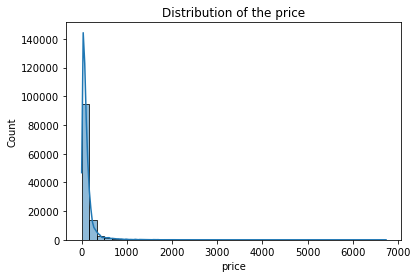

In [303]:
plt.title('Distribution of the price')
sns.histplot(df_all_filtered['price'], bins=40, kde=True)
#plt.savefig('priceDistribution.png')

<AxesSubplot:title={'center':'Distribution of the price'}, xlabel='product_category_name', ylabel='Count'>

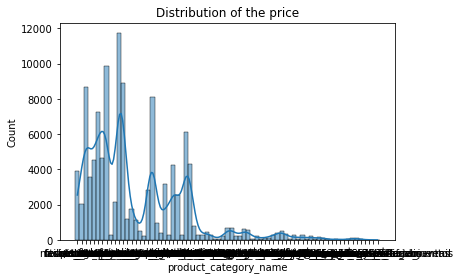

In [304]:
plt.title('Distribution of the price')
sns.histplot(df_all_filtered['product_category_name'], bins=40, kde=True)

<AxesSubplot:title={'center':'Distribution of the customers by states'}, xlabel='customer_state', ylabel='Count'>

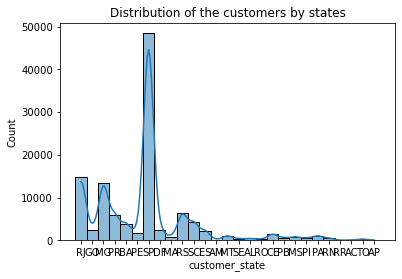

In [305]:
plt.title('Distribution of the customers by states')
sns.histplot(df_all_filtered['customer_state'], bins=40, kde=True)

Money spend by client

Few clients spend the most of the money

In [307]:
df_all_filtered_step = df_all_filtered.sort_values(by=['order_purchase_timestamp', 'customer_unique_id'])

In [331]:
df_all_filtered_step = df_all_filtered_step.assign(NumberOfOrder=df_all_filtered_step.drop_duplicates(["order_purchase_timestamp", "customer_unique_id"]) \
        .groupby(["customer_unique_id"]).cumcount()+1).ffill()

In [332]:
moneySpendbyClient = df_all_filtered_step[['customer_unique_id','price']].groupby('customer_unique_id').mean()

<AxesSubplot:title={'center':'Distribution of money spend by client'}, ylabel='Count'>

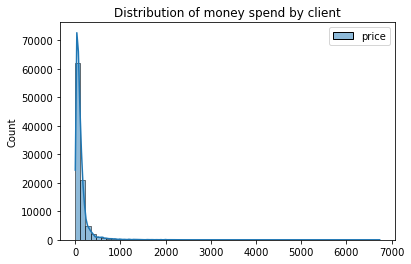

In [333]:
plt.title('Distribution of money spend by client')
sns.histplot(moneySpendbyClient, bins=60, kde=True)

In [334]:
numberOfCommandbyClient = df_all_filtered_step[['customer_unique_id','NumberOfOrder']].groupby('customer_unique_id').sum()

<AxesSubplot:title={'center':'Distribution of money spend by client'}, ylabel='Count'>

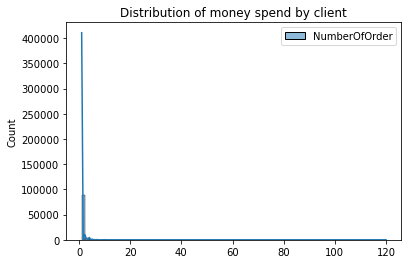

In [335]:
plt.title('Distribution of money spend by client')
sns.histplot(numberOfCommandbyClient, bins=80, kde=True)

In [336]:
numberOfCommandbyClient_detail = df_all_filtered_step[['customer_unique_id','NumberOfOrder']].groupby('customer_unique_id')

In [337]:
numberOfCommandbyClient_filtered = numberOfCommandbyClient_detail.filter(lambda x: x['NumberOfOrder'].sum() == 2)

Number of client with more than one purchase

In [338]:
numberOfCommandbyClient_filtered[['customer_unique_id']].nunique()[0]

8826

List of client with more than one purchase

In [339]:
listActiveClient = numberOfCommandbyClient_filtered['customer_unique_id'].unique().tolist()

Percentage of client with more than one purchase

In [340]:
numberOfCommandbyClient_filtered[['customer_unique_id']].nunique()[0]/df_all_filtered[['customer_unique_id']].nunique()[0]

0.09448161430177167

The list of the client that buy the most

In [318]:
numberOfCommandbyClient_filtered['customer_unique_id'].unique()

array(['b7d76e111c89f7ebf14761390f0f7d17',
       'f176923a0a4ab546c7287791ccb82193',
       'a9530b74fe56ca4be9e5f2c7e7c4175a', ...,
       'e58697e3a253c253e1582f8c4f4c54ff',
       '9dfcc502727549f99c9f73dbd28b35e9',
       '5c58de6fb80e93396e2f35642666b693'], dtype=object)

### DataFrame : Data_customers analysis

In [319]:
data_customers['customer_unique_id'].value_counts()[data_customers['customer_unique_id'].value_counts()> 1]

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
370cd3b09ea745fe047fd11db7430441     2
d7c6bdf20c4ec9c9cda815dde58e778a     2
a366793a4999f8cc135855c4dd347421     2
156283b6ca35ef976a0265903145fd5e     2
d83257348027bd8c59a228cc034de5e3     2
Name: customer_unique_id, Length: 2997, dtype: int64

Customers that bought more than one item

In [320]:
data_customers.groupby('customer_unique_id').filter(lambda x: len(x) > 1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,sao paulo,SP
32,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,camacari,BA
33,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,resende,RJ
...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


##### We want to compare the number of customer with the number of transaction

#####  We almost have the same amount of customers and transactions

Number of customers

In [321]:
data_customers['customer_unique_id'].nunique()

96096

Numbers of orders

In [322]:
data_order_payments['order_id'].nunique()

99440

Type of payment by order

In [323]:
payment_by_order = df_all_filtered.groupby(['payment_type']).count()['order_id'].sort_values(ascending=False)

<BarContainer object of 4 artists>

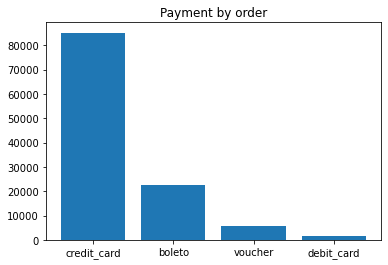

In [324]:
plt.title('Payment by order')
plt.bar(payment_by_order.index, payment_by_order.values)
#plt.savefig('payment_by_order.png')

# Feature Engineering

In [325]:
#data_orders_dataset1 = data_orders_dataset[['customer_id','order_purchase_timestamp']].copy()

In [326]:
#data_orders_dataset1['order_purchase_timestamp'] = data_orders_dataset1['order_purchase_timestamp'].astype('datetime64[ns]')

In [327]:
# Hour of purchase bought by customer
#data_orders_dataset1['Hour_order_purchase'] = data_orders_dataset1['order_purchase_timestamp'].apply(lambda x: x.hour)

In [328]:
# Day of purchase bought by customer
#data_orders_dataset1['Day_order_purchase'] = data_orders_dataset1['order_purchase_timestamp'].apply(lambda x: x.day_name())

Week of order (week or week-end)

In [329]:
#data_orders_dataset1['isWeek_of_order_purchase'] = data_orders_dataset1['order_purchase_timestamp'].apply(lambda x: np.is_busday(x.date())).astype(int).replace(['True', 'False'],[1,0])

In [330]:
#data_orders_dataset2 = data_orders_dataset1.drop('order_purchase_timestamp', axis=1)

In [341]:
#Recency, Frequency and Monetary
rfm = df_all_filtered.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x: (x.max() - x.min()).days,
'order_id': lambda x: len(x),
'price': lambda x: x.sum(),
'payment_value': lambda x: x.max(),
'product_weight_g': lambda x : x.mean(),
'review_score': lambda x : x.mean(), #Mean review score
}).reset_index()

We give a name to the columns

In [342]:
rfm.columns=['customer_unique_id','R','F','M','MaxSpentbyCustomers','product_weightMeanbyCustomer','MeanReviewScore']

In [343]:
rfm['customer_unique_id'].nunique()

93415

# Univarate Analysis

In [3]:
rfm = pd.read_csv('rfm_final.csv')

### Recency

In [8]:
rfm['R'].describe()

count    96737.000000
mean         5.712323
std         37.226804
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        633.000000
Name: R, dtype: float64

<AxesSubplot:title={'center':'Distribution of recency'}, xlabel='R', ylabel='Count'>

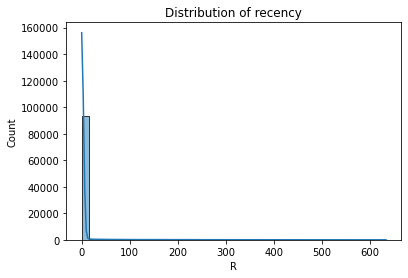

In [9]:
plt.title('Distribution of recency')
sns.histplot(data=rfm, x="R", bins=40, kde=True)

Text(0.5, 1.0, 'Boxplot recency')

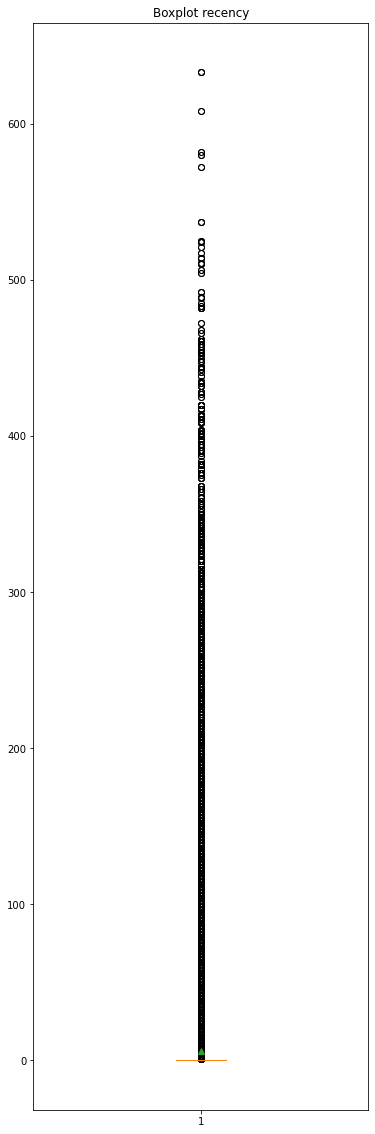

In [12]:
plt.figure(figsize = (6,20))
plt.boxplot(rfm['R'], patch_artist = True, showmeans=True)
#plt.ylim(-3,60)
plt.title('Boxplot recency')
#plt.savefig('boxplot_recency.png')

### Monetary

In [13]:
rfm['M'].describe()

count    96737.000000
mean       153.799091
std        247.113506
min          0.850000
25%         49.000000
50%         91.450000
75%        168.480000
max      13440.000000
Name: M, dtype: float64

<AxesSubplot:title={'center':'Distribution of Monetary'}, xlabel='M', ylabel='Count'>

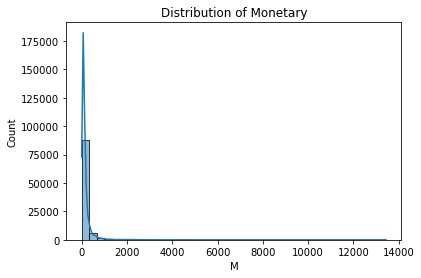

In [14]:
plt.title('Distribution of Monetary')
sns.histplot(data=rfm, x="M", bins=40, kde=True)

Text(0.5, 1.0, 'Boxplot monetary')

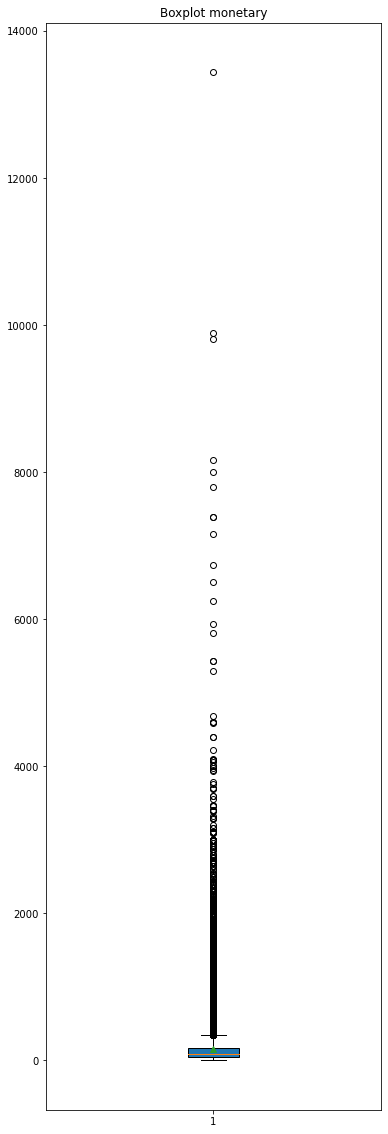

In [15]:
plt.figure(figsize = (6,20))
plt.boxplot(rfm['M'], patch_artist = True, showmeans=True)
#plt.ylim(-3,60)
plt.title('Boxplot monetary')
#plt.savefig('boxplot_monetary.png')

### Frequency

In [16]:
rfm['F'].describe()

count    96737.000000
mean         1.293280
std          0.933503
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         35.000000
Name: F, dtype: float64

<AxesSubplot:title={'center':'Distribution of Frequency'}, xlabel='F', ylabel='Count'>

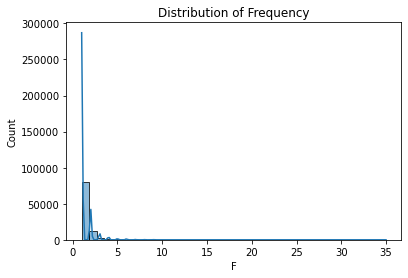

In [19]:
plt.title('Distribution of Frequency')
sns.histplot(data=rfm, x="F", bins=40, kde=True)

Text(0.5, 1.0, 'Boxplot Frequency')

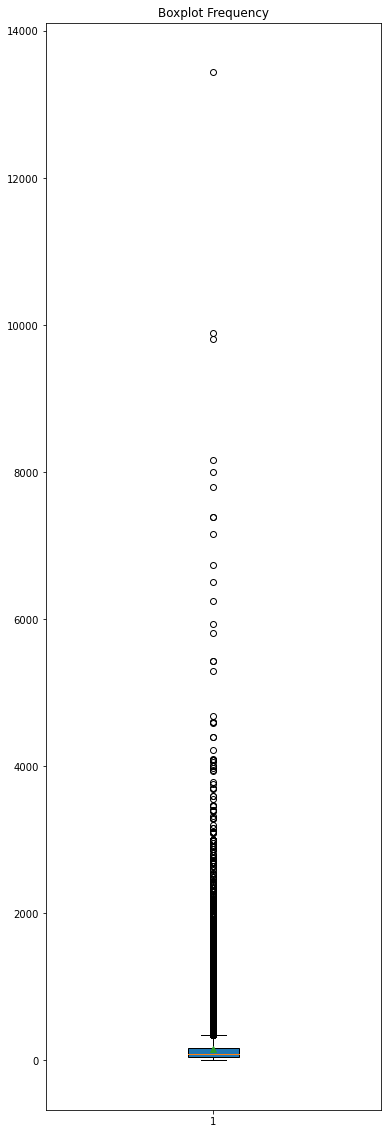

In [21]:
plt.figure(figsize = (6,20))
plt.boxplot(rfm['M'], patch_artist = True, showmeans=True)
#plt.ylim(-3,60)
plt.title('Boxplot Frequency')
#plt.savefig('boxplot_frequency.png')

### MeanReviewScore

In [22]:
rfm['MeanReviewScore'].describe()

count    96737.000000
mean         4.105685
std          1.318843
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: MeanReviewScore, dtype: float64

<AxesSubplot:title={'center':'Distribution of MeanReviewScore'}, xlabel='MeanReviewScore', ylabel='Count'>

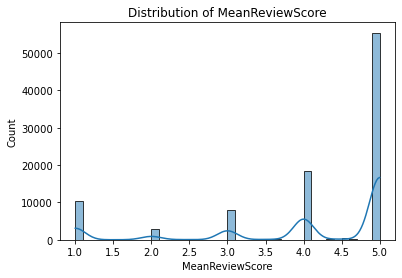

In [23]:
plt.title('Distribution of MeanReviewScore')
sns.histplot(data=rfm, x="MeanReviewScore", bins=40, kde=True)

Text(0.5, 1.0, 'Boxplot MeanReviewScore')

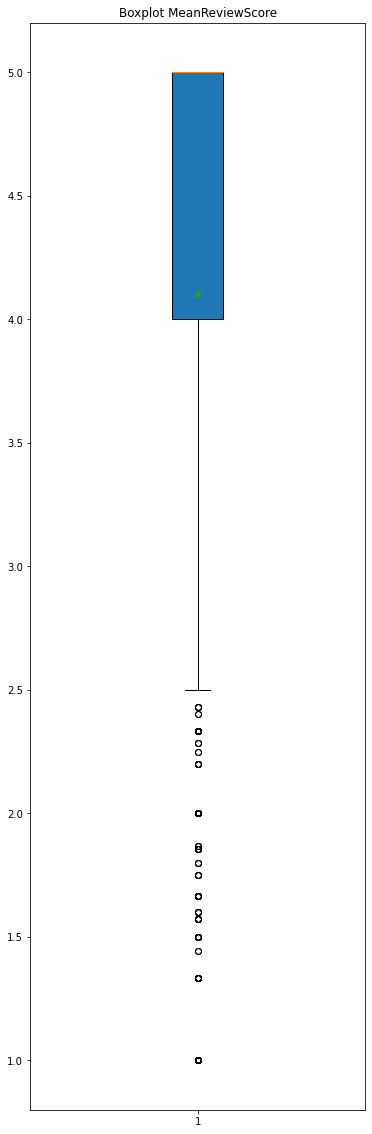

In [24]:
plt.figure(figsize = (6,20))
plt.boxplot(rfm['MeanReviewScore'], patch_artist = True, showmeans=True)
#plt.ylim(-3,60)
plt.title('Boxplot MeanReviewScore')
#plt.savefig('boxplot_frequency.png')

# Multivariate Analysis

Text(0.5, 1.0, 'Scatter plot of Recency and Frequency')

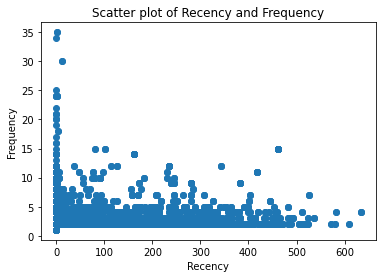

In [31]:
plt.scatter(x = rfm['R'], y = rfm['F'])
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Scatter plot of Recency and Frequency')

Text(0.5, 1.0, 'Scatter plot of Recency and Monetary')

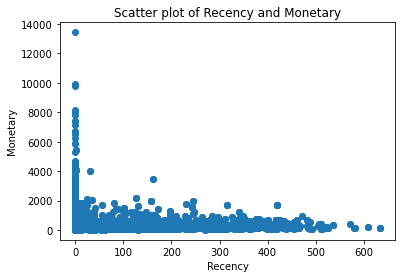

In [60]:
plt.scatter(x = rfm['R'], y = rfm['M'])
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Scatter plot of Recency and Monetary')

Text(0.5, 1.0, 'Scatter plot of Monetary and Frequency')

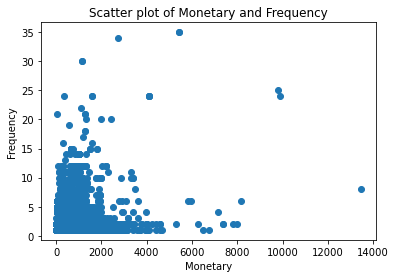

In [33]:
plt.scatter(x = rfm['M'], y = rfm['F'])
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Scatter plot of Monetary and Frequency')

Text(0.5, 1.0, 'Scatter plot of MeanReviewScore and Monetary')

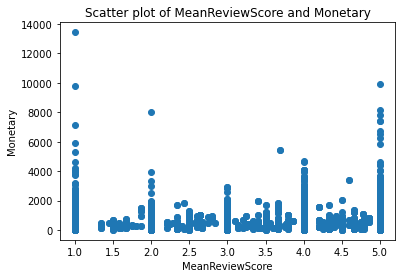

In [37]:
plt.scatter(x = rfm['MeanReviewScore'], y = rfm['M'])
plt.xlabel('MeanReviewScore')
plt.ylabel('Monetary')
plt.title('Scatter plot of MeanReviewScore and Monetary')

Text(0.5, 1.0, 'Scatter plot of MeanReviewScore and Recency')

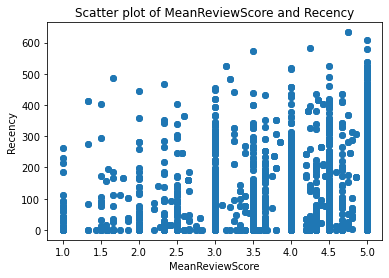

In [36]:
plt.scatter(x = rfm['MeanReviewScore'], y = rfm['R'])
plt.xlabel('MeanReviewScore')
plt.ylabel('Recency')
plt.title('Scatter plot of MeanReviewScore and Recency')

Text(0.5, 1.0, 'Scatter plot of MeanReviewScore and Recency')

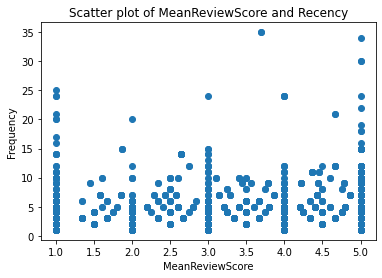

In [38]:
plt.scatter(x = rfm['MeanReviewScore'], y = rfm['F'])
plt.xlabel('MeanReviewScore')
plt.ylabel('Frequency')
plt.title('Scatter plot of MeanReviewScore and Recency')

# Correlation study

In [52]:
X = rfm.drop(['R','customer_unique_id','MaxSpentbyCustomers','product_weightMeanbyCustomer','order_purchase_timestamp'],axis=1)
Y = rfm['R']

In [53]:
for i in X.columns:
    print("Hypothesis : Recency variable and the variable "+i+" are not correlated\nCorrelation coefficient (Recency and "+i+"):\n"+str(stats.pearsonr(Y, X[i])[0])+"\n")

Hypothesis : Recency variable and the variable F are not correlated
Correlation coefficient (Recency and F):
0.31995140438021885

Hypothesis : Recency variable and the variable M are not correlated
Correlation coefficient (Recency and M):
0.10087509129704898

Hypothesis : Recency variable and the variable MeanReviewScore are not correlated
Correlation coefficient (Recency and MeanReviewScore):
0.023790071087273032



In [54]:
X = rfm.drop(['F','customer_unique_id','MaxSpentbyCustomers','product_weightMeanbyCustomer','order_purchase_timestamp'],axis=1)
Y = rfm['F']

In [55]:
for i in X.columns:
    print("Hypothesis : Frequency variable and the variable "+i+" are not correlated\nCorrelation coefficient (Frequency and "+i+"):\n"+str(stats.pearsonr(Y, X[i])[0])+"\n")

Hypothesis : Frequency variable and the variable R are not correlated
Correlation coefficient (Frequency and R):
0.31995140438021885

Hypothesis : Frequency variable and the variable M are not correlated
Correlation coefficient (Frequency and M):
0.30802626558826596

Hypothesis : Frequency variable and the variable MeanReviewScore are not correlated
Correlation coefficient (Frequency and MeanReviewScore):
-0.06783627230875966



In [56]:
X = rfm.drop(['M','customer_unique_id','MaxSpentbyCustomers','product_weightMeanbyCustomer','order_purchase_timestamp'],axis=1)
Y = rfm['M']

In [57]:
for i in X.columns:
    print("Hypothesis : Monetary variable and the variable "+i+" are not correlated\nCorrelation coefficient (Monetary and "+i+"):\n"+str(stats.pearsonr(Y, X[i])[0])+"\n")

Hypothesis : Monetary variable and the variable R are not correlated
Correlation coefficient (Monetary and R):
0.10087509129704898

Hypothesis : Monetary variable and the variable F are not correlated
Correlation coefficient (Monetary and F):
0.30802626558826596

Hypothesis : Monetary variable and the variable MeanReviewScore are not correlated
Correlation coefficient (Monetary and MeanReviewScore):
-0.03731013804617838



In [58]:
X = rfm.drop(['MeanReviewScore','customer_unique_id','MaxSpentbyCustomers','product_weightMeanbyCustomer','order_purchase_timestamp'],axis=1)
Y = rfm['MeanReviewScore']

In [59]:
for i in X.columns:
    print("Hypothesis : MeanReviewScore variable and the variable "+i+" are not correlated\nCorrelation coefficient (MeanReviewScore and "+i+"):\n"+str(stats.pearsonr(Y, X[i])[0])+"\n")

Hypothesis : MeanReviewScore variable and the variable R are not correlated
Correlation coefficient (MeanReviewScore and R):
0.023790071087273032

Hypothesis : MeanReviewScore variable and the variable F are not correlated
Correlation coefficient (MeanReviewScore and F):
-0.06783627230875966

Hypothesis : MeanReviewScore variable and the variable M are not correlated
Correlation coefficient (MeanReviewScore and M):
-0.03731013804617838



# Data Maintenance

The maintenance analysis will focus on active client

In [344]:
df_date = pd.merge(data_orders_dataset, data_customers[['customer_id','customer_unique_id']], on='customer_id', how='inner')

In [345]:
df_date_maintenance = df_date[['customer_unique_id','order_purchase_timestamp']]

In [346]:
df_date_maintenance.isna().mean()

customer_unique_id          0.0
order_purchase_timestamp    0.0
dtype: float64

In [347]:
rfm_final_maintenance = pd.merge(rfm, df_date_maintenance, on='customer_unique_id', how='inner')
#rfm_final_maintenance = pd.merge(rfm_maintenance, df_date_maintenance, on='customer_unique_id', how='inner')

In [348]:
rfm_final_maintenance.isna().mean()

customer_unique_id              0.0
R                               0.0
F                               0.0
M                               0.0
MaxSpentbyCustomers             0.0
product_weightMeanbyCustomer    0.0
MeanReviewScore                 0.0
order_purchase_timestamp        0.0
dtype: float64

# Data Export

In [151]:
#rfm.to_csv("rfm.csv", index=False)

In [350]:
#rfm_final_maintenance.to_csv("rfm_final.csv", index=False)

In [94]:
#df_all_filtered_final.to_csv("dataEcommerce.csv", index=False)